#Concrete Strength

##Geração de Hipótese

1. A força do concreto é proporcional a idade do concreto.
2. Em uma determinada quantidade de dias o concreto atinje sua resistência máxima.
3. Aditivos podem alterar a resistência do contreto.
4. A proporção dos elementos do concreto influênciam no na resistência.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Data Concrete Strength/Concrete_Data_Yeh.csv")
print(data.shape)
data.head()

(1030, 9)


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.columns = ["cimento", "escória","cinza_volante", "água","superplastificante", "agregado_graúdo", "agregado_miúdo", "idade", "csMPa"]

In [ ]:
data.dtypes

cimento               float64
escória               float64
cinza_volante         float64
água                  float64
superplastificante    float64
agregado_graúdo       float64
agregado_miúdo        float64
idade                   int64
csMPa                 float64
dtype: object

In [ ]:
data.describe()

,cimento,escória,cinza_volante,água,superplastificante,agregado_graúdo,agregado_miúdo,idade,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Observando a descrição dos dados vemos que há materiais insumos necessários em qualquer concreto, que são o cimento, água, agregado graúdo e miúdo, e também temos os aditivos que se percebe pelo valor mínimo igual a 0. A idade é contada em dias e vai de 1 a 365 dias.

Primeiro irei verificar as variáveis de aditivos.

In [ ]:
print("Sem escória: %d" % data.query("escória == 0")["escória"].count())
print("Com escória: %d" % data.query("escória > 0")["escória"].count())

Sem escória: 471
Com escória: 559


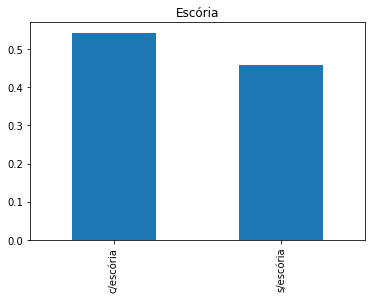

In [ ]:
value_escória = data["escória"].apply(lambda x: "s/escória" if x == 0 else "c/escória")
value_escória.value_counts(normalize=True).plot.bar(title = 'Escória')

In [ ]:
print("Sem superplastificante	: %d" % data.query("superplastificante == 0")["superplastificante"].count())
print("Com superplastificante	: %d" % data.query("superplastificante > 0")["superplastificante"].count())

Sem superplastificante	: 379
Com superplastificante	: 651


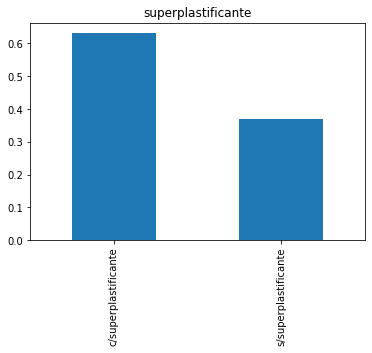

In [ ]:
value_superplastificante = data["superplastificante"].apply(lambda x: "s/superplastificante" if x == 0 else "c/superplastificante")
value_superplastificante.value_counts(normalize=True).plot.bar(title = 'superplastificante')

In [ ]:
print("Sem cinza_volante: %d" % data.query("cinza_volante == 0")["cinza_volante"].count())
print("Com cinza_volante: %d" % data.query("cinza_volante > 0")["cinza_volante"].count())

Sem cinza_volante: 566
Com cinza_volante: 464


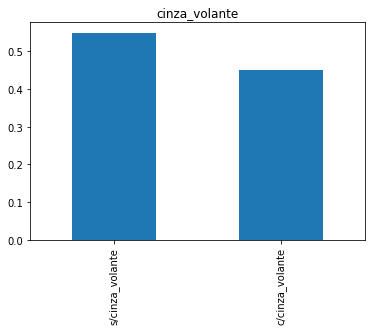

In [ ]:
value_cinza_volante = data["cinza_volante"].apply(lambda x: "s/cinza_volante" if x == 0 else "c/cinza_volante")
value_cinza_volante.value_counts(normalize=True).plot.bar(title = 'cinza_volante')

In [ ]:
data.query("escória == 0 and superplastificante ==0 and cinza_volante == 0")["csMPa"].head()

9     39.29
15    52.91
19    42.62
24    52.52
25    53.30
Name: csMPa, dtype: float64

209 das amostras não contém aditivos. Depois, tenho que ver a diferença que cada aditivo faz individualmente na resitência.

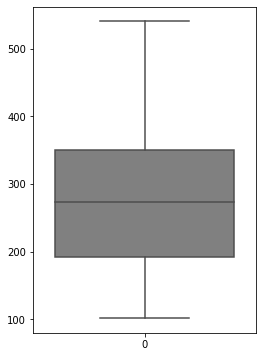

In [ ]:
#Cimento
plt.figure(figsize=(4,6))
ax = sns.boxplot(data = data["cimento"], color="Gray")

plt.show()

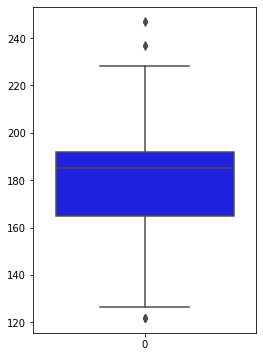

In [ ]:
#Cimento
plt.figure(figsize=(4,6))
ax = sns.boxplot(data = data["água"], color="Blue")

plt.show()

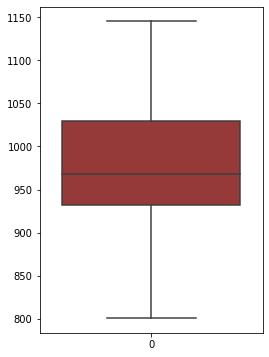

In [ ]:
#agregado_graúdo
plt.figure(figsize=(4,6))
ax = sns.boxplot(data = data["agregado_graúdo"], color="Brown")

plt.show()

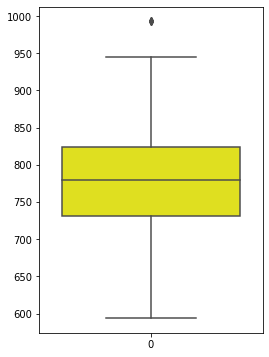

In [ ]:
#agregado_miúdo
plt.figure(figsize=(4,6))
ax = sns.boxplot(data = data["agregado_miúdo"], color="Yellow")

plt.show()

Ver como o outlier afetou na resistência.

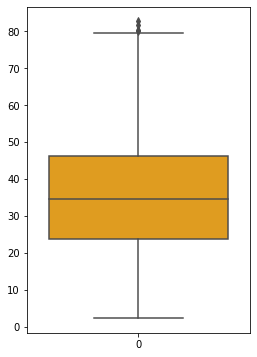

In [ ]:
plt.figure(figsize=(4,6))
ax = sns.boxplot(data = data["csMPa"], color="Orange")

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


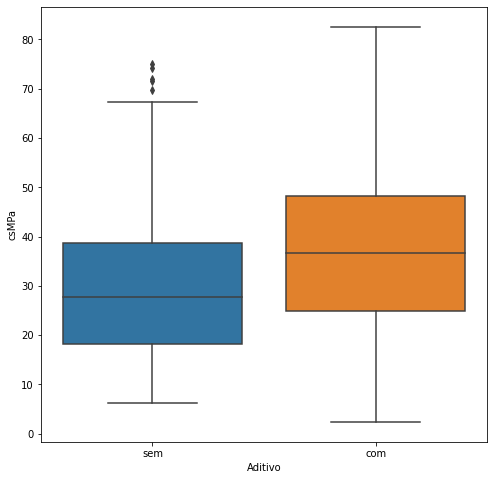

In [ ]:
resistência_sem_aditivos = data.query("escória == 0 and superplastificante ==0 and cinza_volante == 0")
reistência_com_aditivos = data.query("escória > 0| superplastificante > 0|cinza_volante > 0")
resistência_sem_aditivos["Aditivo"] = "sem"
reistência_com_aditivos["Aditivo"] = "com"
resistência_e_aditivo = pd.concat([resistência_sem_aditivos, reistência_com_aditivos], ignore_index=True)

ax = plt.figure(figsize=(8,8)).gca() # define axis
sns.boxplot(x = 'Aditivo', y = 'csMPa', data = resistência_e_aditivo, ax = ax)

A uma diferença, só falta ver qual dos aditivos influencia mais.



In [ ]:
resistência_e_aditivo

,cimento,escória,cinza_volante,água,superplastificante,agregado_graúdo,agregado_miúdo,idade,csMPa,Aditivo
0,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29,sem
1,380.0,0.0,0.0,228.0,0.0,932.0,670.0,90,52.91,sem
2,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62,sem
3,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52,sem
4,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270,53.30,sem
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,com
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,com
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,com
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,com


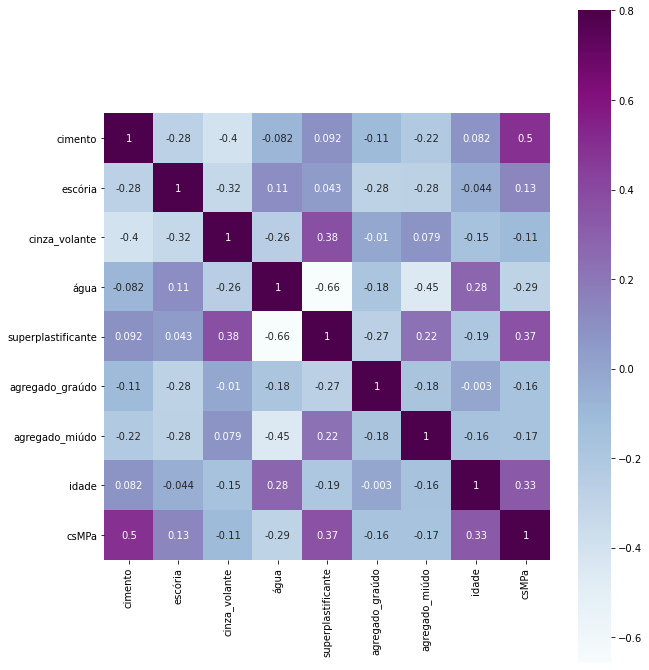

In [ ]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(data.corr(), vmax=.8, square=True, cmap="BuPu",annot=True);

As variáveis mais correlacionadas com a resistência são o cimento, superplastificante e a idade.

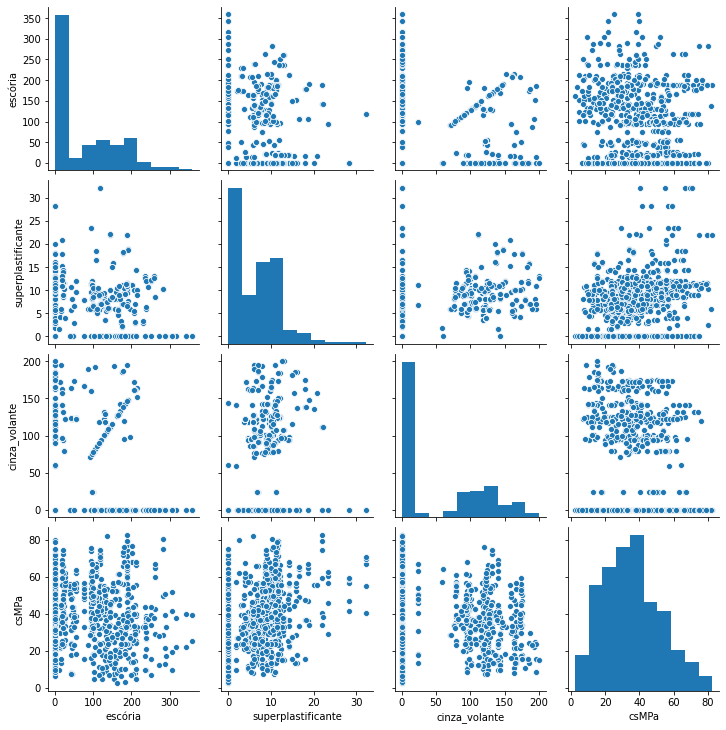

In [ ]:
sns.pairplot(data = data[["escória", "superplastificante", "cinza_volante", "csMPa"]])

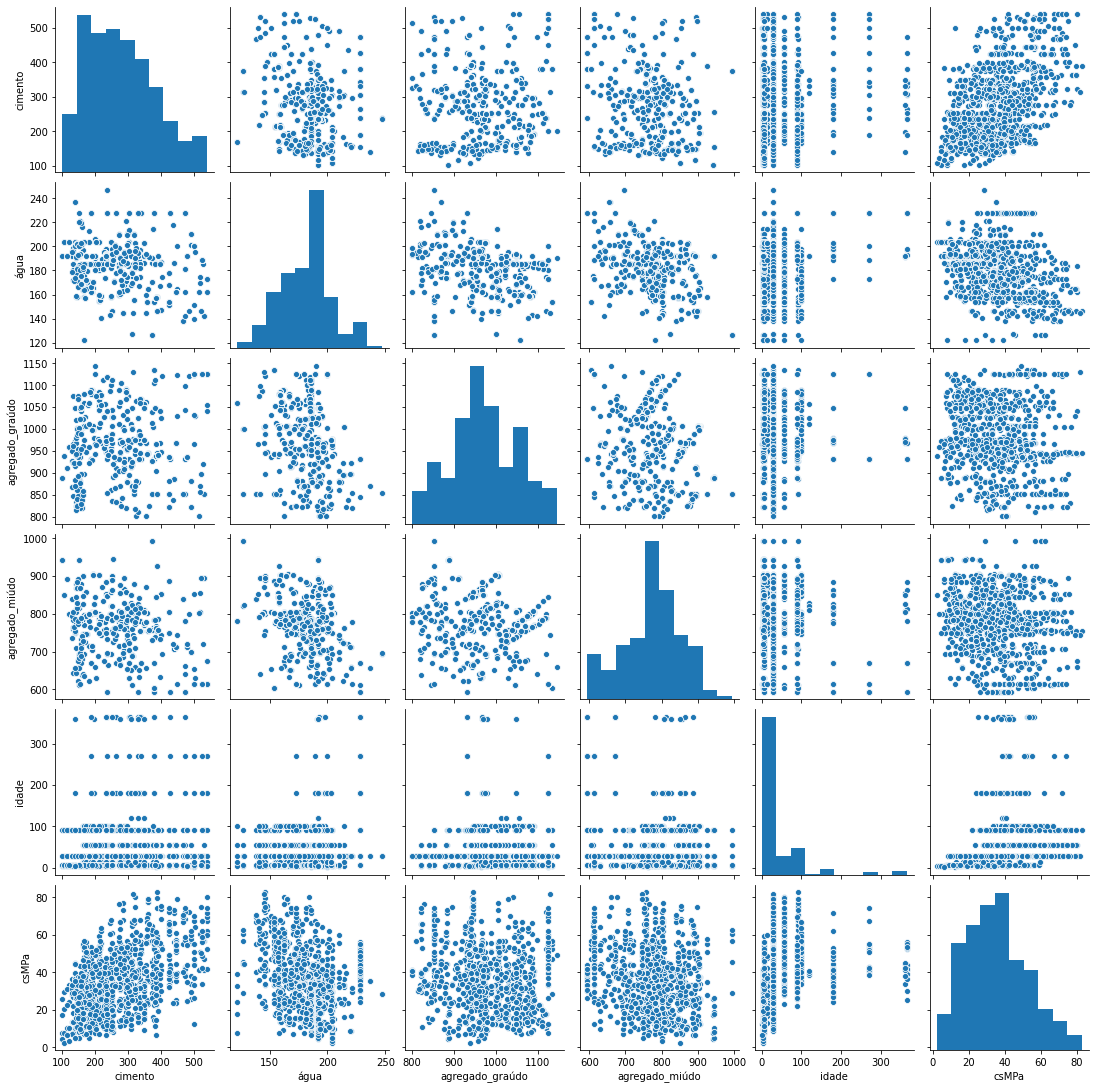

In [ ]:
sns.pairplot(data = data[["cimento", "água", "agregado_graúdo", "agregado_miúdo", "idade", "csMPa"]])

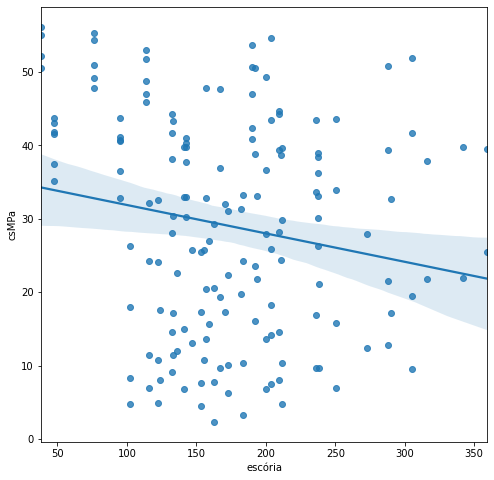

In [ ]:
só_escoria = data.query("escória > 0 and superplastificante ==0 and cinza_volante == 0")
ax = plt.figure(figsize=(8, 8)).gca() # define axis
sns.regplot(x="escória", y="csMPa", data= só_escoria, ax = ax)

In [ ]:
só_escoria.drop(['cimento', 'cinza_volante', 'água', 'superplastificante', 'agregado_graúdo', 'agregado_miúdo', 'idade'], axis=1).corr()

,escória,csMPa
escória,1.00000,-0.18259
csMPa,-0.18259,1.00000


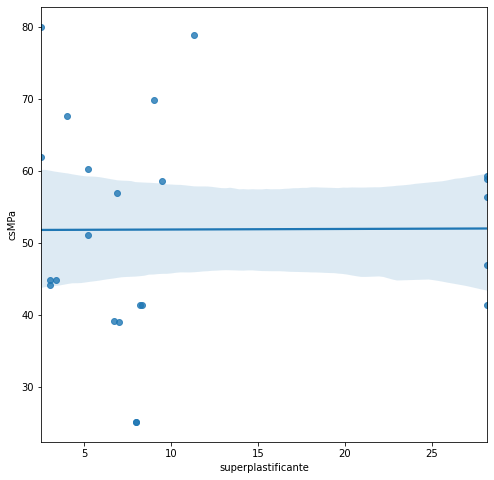

In [ ]:
só_superplastificante = data.query("escória == 0 and superplastificante > 0 and cinza_volante == 0")
ax = plt.figure(figsize=(8, 8)).gca() # define axis
sns.regplot(x="superplastificante", y="csMPa", data= só_superplastificante, ax = ax)

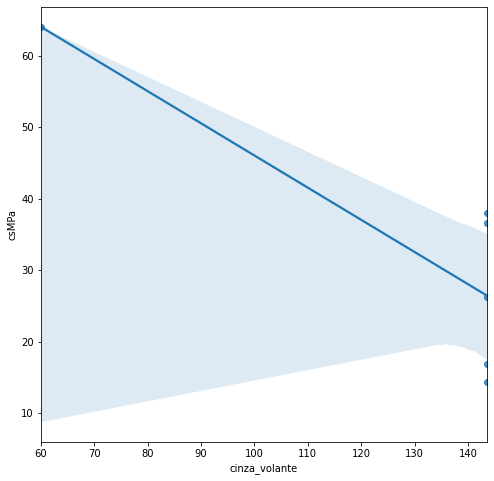

In [ ]:
só_cinza_volante = data.query("escória == 0 and superplastificante == 0 and cinza_volante > 0")
ax = plt.figure(figsize=(8, 8)).gca() # define axis
sns.regplot(x="cinza_volante", y="csMPa", data= só_cinza_volante, ax = ax)

Não tem dados suficientes para analisar os aditivos separadamente.

                    superplastificante     csMPa
superplastificante            1.000000  0.284473
csMPa                         0.284473  1.000000


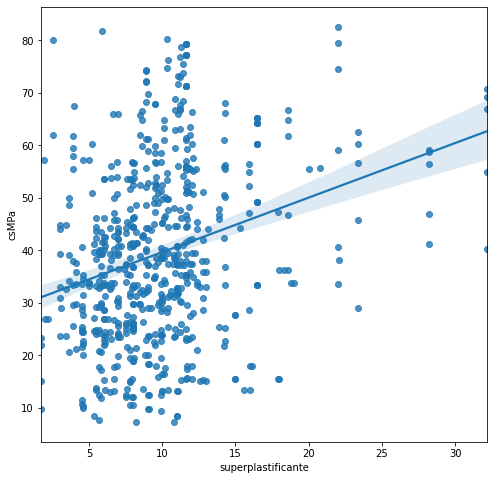

In [ ]:
com_superplastificante = data.query("superplastificante > 0")
ax = plt.figure(figsize=(8, 8)).gca() # define axis
sns.regplot(x="superplastificante", y="csMPa", data= com_superplastificante, ax = ax)

print(com_superplastificante.drop(['cimento', 'cinza_volante', 'água', 'escória', 'agregado_graúdo', 'agregado_miúdo', 'idade'], axis=1).corr())

          escória     csMPa
escória  1.000000 -0.100259
csMPa   -0.100259  1.000000


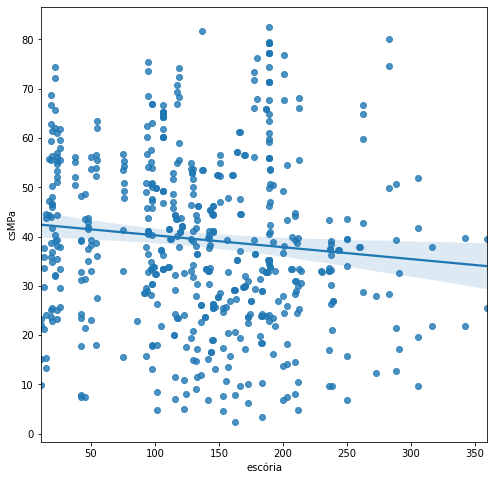

In [ ]:
com_escória = data.query("escória > 0")
ax = plt.figure(figsize=(8, 8)).gca() # define axis
sns.regplot(x="escória", y="csMPa", data= com_escória, ax = ax)

print(com_escória.drop(['cimento', 'cinza_volante', 'água', 'superplastificante', 'agregado_graúdo', 'agregado_miúdo', 'idade'], axis=1).corr())

          escória     csMPa
escória  1.000000  0.099444
csMPa    0.099444  1.000000


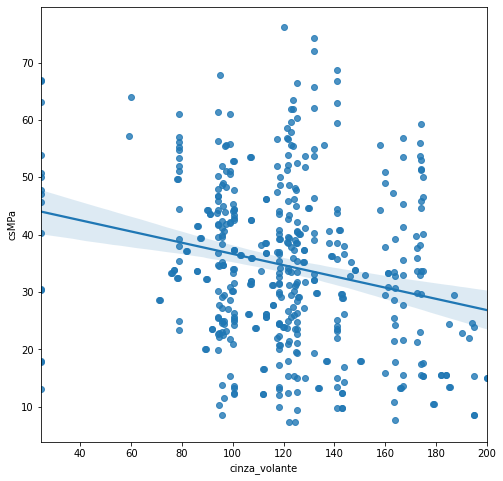

In [ ]:
com_cinza_volante = data.query("cinza_volante > 0")
ax = plt.figure(figsize=(8, 8)).gca() # define axis
sns.regplot(x="cinza_volante", y="csMPa", data= com_cinza_volante, ax = ax)

print(com_cinza_volante.drop(['cimento', 'cinza_volante', 'água', 'superplastificante', 'agregado_graúdo', 'agregado_miúdo', 'idade'], axis=1).corr())

Não há muita relação entre os aditivos e a resistência a compressão.

#Idade e resistência a compressão

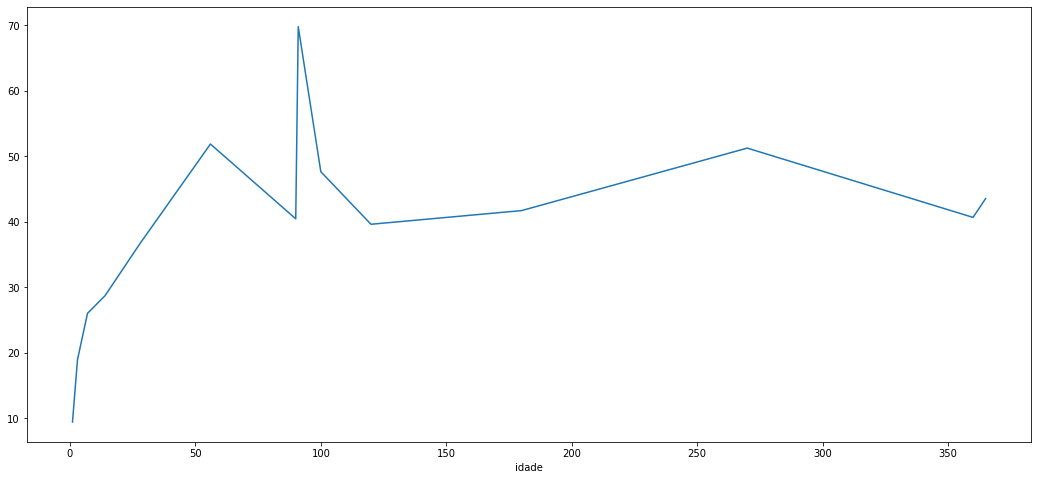

In [ ]:
plt.figure(figsize=(18, 8))
data.groupby('idade')['csMPa'].mean().plot()

A resistência sobe bastante nos primeiros dia, mas a partir dos 28 dias tende a ficar igual a resitência, a aumentos que se devem a quantidade reduzida de amostras nesse dias.

In [ ]:
data['idade'].value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: idade, dtype: int64

In [ ]:
data_sem_aditivo = resistência_e_aditivo.query('Aditivo == "sem"')

In [ ]:
data_sem_aditivo['idade'].value_counts()

28     61
7      48
90     25
3      25
180    16
14     11
365     6
270     5
360     4
120     3
56      2
1       2
100     1
Name: idade, dtype: int64

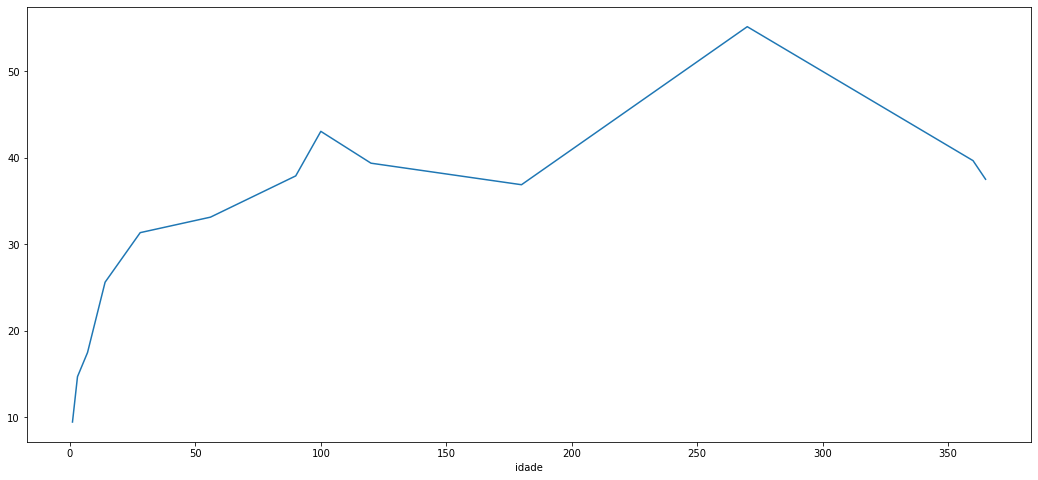

In [ ]:
csMPa_medio_por_idade = data_sem_aditivo.groupby('idade')['csMPa'].median()

plt.figure(figsize=(18, 8))
csMPa_medio_por_idade.plot()

In [ ]:
csMPa_medio_por_idade

idade
1       9.455
3      14.700
7      17.490
14     25.620
28     31.350
56     33.140
90     37.910
100    43.060
120    39.380
180    36.890
270    55.160
360    39.675
365    37.520
Name: csMPa, dtype: float64

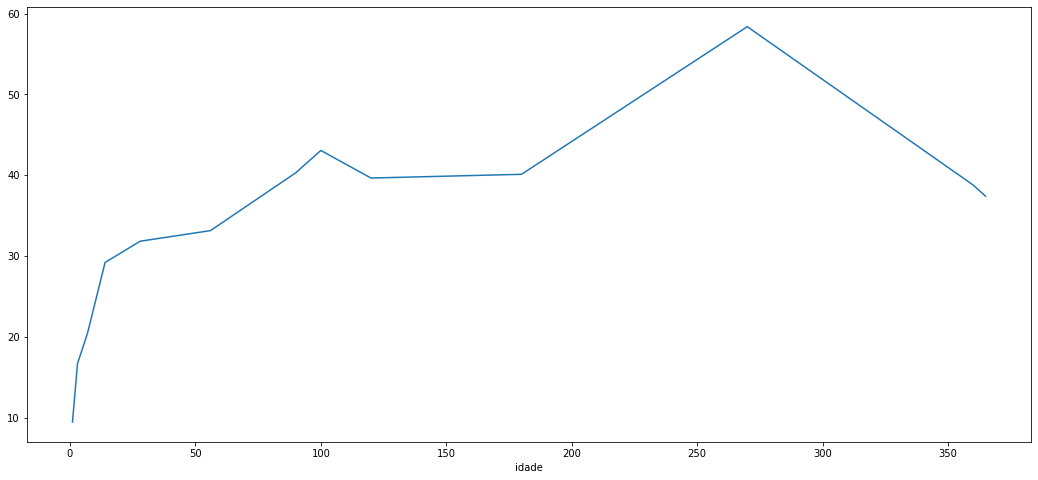

In [ ]:
csMPa_medio_por_idade = data_sem_aditivo.groupby('idade')['csMPa'].mean()

plt.figure(figsize=(18, 8))
csMPa_medio_por_idade.plot()

In [ ]:
data_sem_aditivo

,cimento,escória,cinza_volante,água,superplastificante,agregado_graúdo,agregado_miúdo,idade,csMPa,Aditivo
0,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29,sem
1,380.0,0.0,0.0,228.0,0.0,932.0,670.0,90,52.91,sem
2,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62,sem
3,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52,sem
4,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270,53.30,sem
...,...,...,...,...,...,...,...,...,...,...
204,302.0,0.0,0.0,203.0,0.0,974.0,817.0,28,21.75,sem
205,397.0,0.0,0.0,185.0,0.0,1040.0,734.0,28,39.09,sem
206,480.0,0.0,0.0,192.0,0.0,936.0,721.0,3,24.39,sem
207,522.0,0.0,0.0,146.0,0.0,896.0,896.0,7,50.51,sem


In [ ]:
data_sem_aditivo.groupby('idade')

In [ ]:
train, test = train_test_split(data, test_size=0.3,random_state=1)

In [ ]:
#train and test dataset
x_train = train.drop('csMPa', axis=1)
y_train = train['csMPa']

x_test = test.drop('csMPa', axis=1)
y_test = test['csMPa']

#Construção do Modelo

In [ ]:
###Linear Regression
reg = LinearRegression().fit(x_train,y_train)
reg.score(x_train, y_train)

0.6411898137954829

In [ ]:
pred = reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("RMSE: {}".format(rmse))
print("MAE: {}".format(mae))
print("R2: {}".format(r2))

RMSE: 10.962721175664736
MAE: 8.711447577379673
R2: 0.5414805238935219


In [ ]:
###Decision Tree Regressor
reg2 = DecisionTreeRegressor(max_depth=8).fit(x_train,y_train)
reg2.score(x_train, y_train)

0.9621713476681768

In [ ]:
pred = reg2.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("RMSE: {}".format(rmse))
print("MAE: {}".format(mae))
print("R2: {}".format(r2))

RMSE: 7.841347935816807
MAE: 5.36471268496551
R2: 0.7654137784769841


In [ ]:
train, test = train_test_split(resistência_e_aditivo, test_size=0.3,random_state=1)

In [ ]:
#train and test dataset
x_train = train.drop('csMPa', axis=1)
y_train = train['csMPa']

x_test = test.drop('csMPa', axis=1)
y_test = test['csMPa']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x_train['Aditivo'] = le.fit_transform(x_train['Aditivo'])
x_test['Aditivo'] = le.fit_transform(x_test['Aditivo'])
x_train.dtypes

cimento               float64
escória               float64
cinza_volante         float64
água                  float64
superplastificante    float64
agregado_graúdo       float64
agregado_miúdo        float64
idade                   int64
Aditivo                 int64
dtype: object

In [ ]:
pickle.dump(le, open('encoder_aditivo.pkl', 'wb'))

In [ ]:
###Linear Regression
reg = LinearRegression().fit(x_train,y_train)
reg.score(x_train, y_train)

0.6181210712961072

In [ ]:
pred = reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("RMSE: {}".format(rmse))
print("MAE: {}".format(mae))
print("R2: {}".format(r2))

RMSE: 10.342740742873424
MAE: 8.155756905444708
R2: 0.6281318743931286


In [ ]:
###Decision Tree Regressor
reg2 = DecisionTreeRegressor(max_depth=7)

In [ ]:
reg2.fit(x_train,y_train)
reg2.score(x_train, y_train)

0.9158194799324682

In [ ]:
pred = reg2.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("RMSE: {}".format(rmse))
print("MAE: {}".format(mae))
print("R2: {}".format(r2))

RMSE: 7.55426870668402
MAE: 5.556092493305513
R2: 0.8016178763330304


In [ ]:
!pwd

/content


In [ ]:
#Save train model
import pickle
pickle.dump(reg2 ,open('mo.pkl', 'wb'))
